In [9]:
!pip install SciencePlots

  Obtaining dependency information for SciencePlots from https://files.pythonhosted.org/packages/80/0c/a3980bf9d0dcca352f5e74ccbac889c5bcf6a12861628bb4f91eeaf50ab9/SciencePlots-2.1.0-py3-none-any.whl.metadata


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])

In [7]:
ss = pd.read_csv('sample_submission.csv')

In [11]:
ss.shape

(3500, 37)

In [8]:
ss.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


## Separate columns into types

In [ ]:
O2_cols = [col for col in ss.columns if 'O2' in col and 'N' not in col]
NH4_cols = [col for col in ss.columns if 'NH4' in col]
NO2_cols = [col for col in ss.columns if 'NO2' in col]
NO3_cols = [col for col in ss.columns if 'NO3' in col]
BOD5_cols = [col for col in ss.columns if 'BOD5' in col]

## Correlation with Target

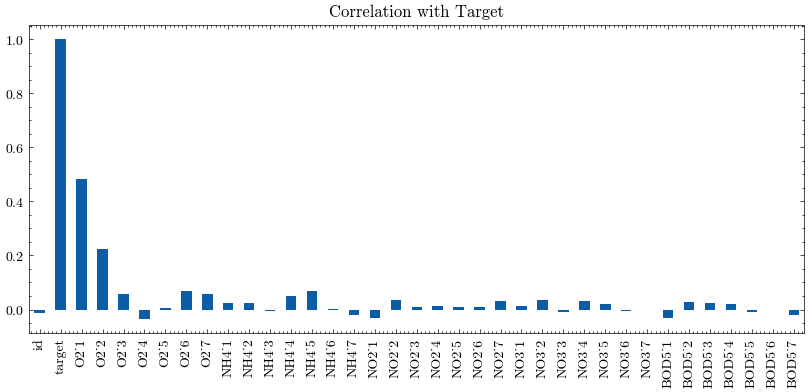

In [13]:
plt.figure(figsize=(10,4))
ss.corrwith(ss.target).plot(kind='bar')
plt.title('Correlation with Target');